In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Question 5

---

In [7]:
def find_root(conn, x):
    tmp = x
    while conn[tmp] != 0:
        tmp = conn[tmp]
        
    return tmp

def connected_components(im, neigh):
    im = np.int32(im)
    m, n = im.shape
    
    ret = np.zeros((m, n), dtype=int)
    p = 1
    conn = np.zeros((m*n), dtype=int)
    
    # Pass 1
    for i in range(m):
        for j in range(n):
            if im[i][j] == 1:
                arr = np.zeros(4, dtype=int)
                
                if j-1 >= 0:
                    arr[0] = ret[i][j-1]
                    
                if i-1 >= 0:
                    arr[1] = ret[i-1][j]
                    
                if neigh == 8:
                    if i-1 >= 0 and j-1 >= 0:
                        arr[2] = ret[i-1][j-1]
                        
                    if i-1 >= 0 and j+1 < n:
                        arr[3] = ret[i-1][j+1]
                
                arr = arr[arr != 0]
                
                if arr.shape[0] == 0:
                    ret[i][j] = p
                    p += 1
                else:
                    ret[i][j] = np.min(arr)
                    min_root = find_root(conn, ret[i][j])
                    
                    rep = arr[arr != ret[i][j]]
                    rep = np.unique(rep)
                    
                    if rep.shape[0] == 0:
                        continue
                        
                    for k in rep:
                        k_root = find_root(conn, k)
                        
                        if k_root != min_root:
                            conn[k_root] = ret[i][j]
                        
    # Pass 2
    for i in range(m):
        for j in range(n):
            if im[i][j] == 1:
                ret[i][j] = find_root(conn, ret[i][j])
                
    labels = np.unique(ret)
    for i in range(len(labels)):
        ret[ret == labels[i]] = i
    
    return labels.shape[0], ret

#### 1. Number of components for each of the five colors in input image.

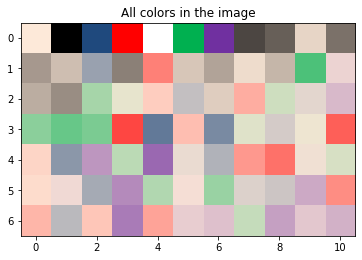

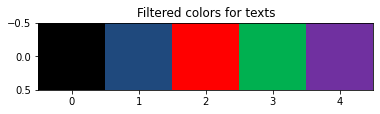

In [8]:
im = cv2.imread('../images/colourful_text.png')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

all_col, col_cnt = np.unique(im.reshape(-1, im.shape[2]), axis=0, return_counts=True)
idx = np.flipud(np.argsort(col_cnt))

plt.imshow(all_col[idx].reshape(7, -1, 3))
plt.title("All colors in the image")
plt.show()

colors = np.empty((5, 3), dtype=int)
colors[0:3] = all_col[idx[1:4]]
colors[3:5] = all_col[idx[5:7]]

plt.imshow(colors.reshape(1, 5, 3))
plt.title("Filtered colors for texts")
plt.show()

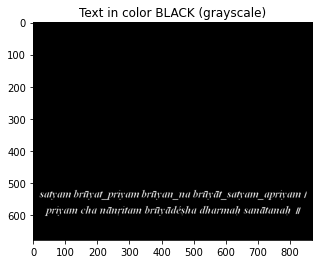

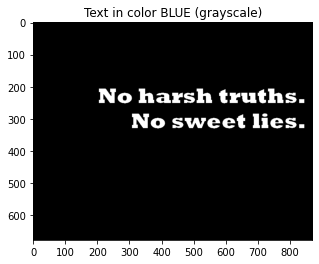

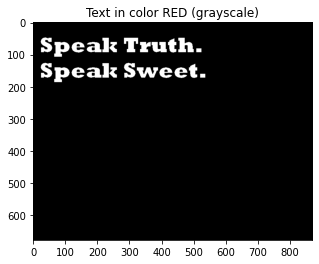

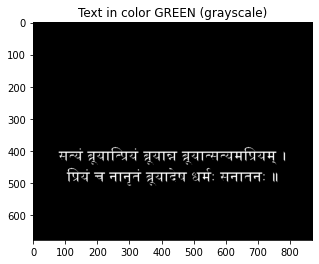

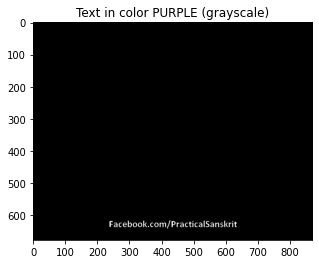

In [9]:
m, n, d = im.shape
text_imgs_col = np.ones((5, m, n, d), dtype=int)*255
text_imgs = np.zeros((5, m, n), dtype=int)

color_names = np.array(['BLACK', 'BLUE', 'RED', 'GREEN', 'PURPLE'])

for i, c in enumerate(colors):
    text_imgs[i] = np.where(np.sum(im == c, axis=2) == 3, 1, 0)
    for x in range(m):
        for y in range(n):
            if np.sum(im[x][y] == c) == 3:
                text_imgs_col[i][x][y] = c
    
    # For removing black borders
    if np.sum(c == np.zeros(3)) == 3:
        text_imgs[i][0:30, :] = 0
        text_imgs[i][650:, :] = 0
        text_imgs[i][:, 0:20] = 0
        text_imgs[i][:, -20:] = 0
        
        text_imgs_col[i][0:30, :] = 255
        text_imgs_col[i][650:, :] = 255
        text_imgs_col[i][:, 0:20] = 255
        text_imgs_col[i][:, -20:] = 255
    
    plt.imshow(text_imgs[i], cmap='gray')
    plt.title("Text in color " + color_names[i] + " (grayscale)")
    plt.show()

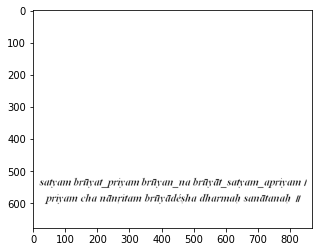

Number of components in the above text color (BLACK): 241


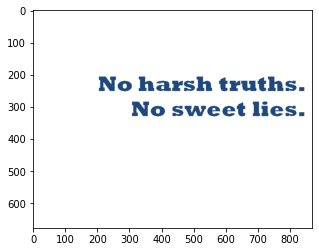

Number of components in the above text color (BLUE): 27


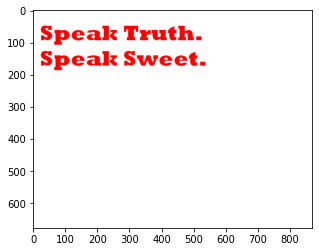

Number of components in the above text color (RED): 24


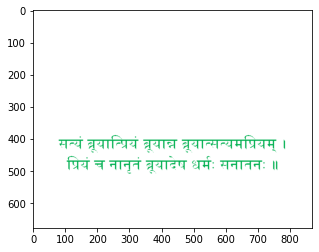

Number of components in the above text color (GREEN): 74


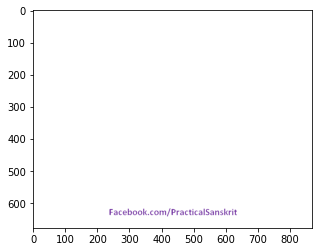

Number of components in the above text color (PURPLE): 34


In [10]:
for i, t in enumerate(text_imgs):
    num_labels, labels_im = connected_components(t, 8)
    
    plt.imshow(text_imgs_col[i])
    plt.show()
    
    print("Number of components in the above text color (" + color_names[i] + "):", num_labels-1)

#### 2. telugu.jpeg and tamil.jpeg

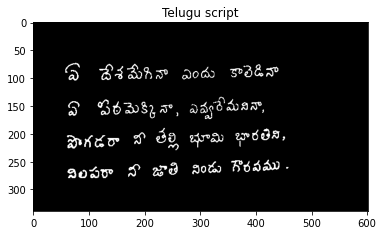

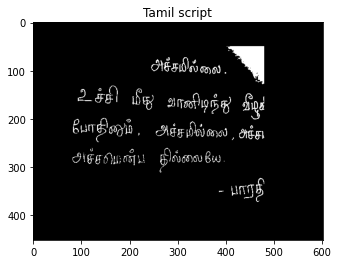

Number of components in telugu script: 67
Number of components in tamil script: 93


In [11]:
im_tel = cv2.imread('../images/telugu.jpeg')
im_tel = cv2.cvtColor(im_tel, cv2.COLOR_BGR2GRAY)

_, tel_thresh = cv2.threshold(im_tel, 94, 1, cv2.THRESH_BINARY_INV)

telugu = np.zeros(tel_thresh.shape)
telugu[50:280, 50:480] = tel_thresh[50:280, 50:480]

plt.imshow(telugu, cmap='gray')
plt.title("Telugu script")
plt.show()

tel_num, tel_lab = connected_components(telugu, 8)

im_tam = cv2.imread('../images/tamil.jpeg')
im_tam = cv2.cvtColor(im_tam, cv2.COLOR_BGR2GRAY)

_, tam_thresh = cv2.threshold(im_tam, 220, 1, cv2.THRESH_BINARY_INV)

tamil = np.zeros(tam_thresh.shape)
tamil[50:400, 50:480] = tam_thresh[50:400, 50:480]

plt.imshow(tamil, cmap='gray')
plt.title("Tamil script")
plt.show()

tam_num, tam_lab = connected_components(tamil, 8)

print("Number of components in telugu script:", tel_num)
print("Number of components in tamil script:", tam_num)

#### (a). Letters containing one empty region.

Number of letters having one empty region in telugu script: 42


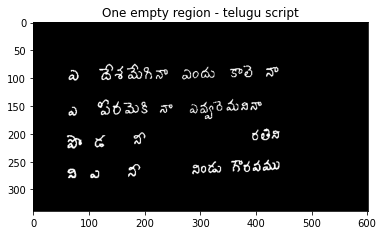

In [12]:
tel_ret = np.zeros(tel_lab.shape)

count = 0
for i in range(1, tel_num):
    new = np.where(tel_lab == i, 1, 0)
    new_in = 1 - new
    
    num, lab = connected_components(new_in, 8)
    if num == 3:
        count += 1
        tel_ret[new == 1] = 1
        
print("Number of letters having one empty region in telugu script:", count)

plt.imshow(tel_ret, cmap='gray')
plt.title("One empty region - telugu script")
plt.show()

Number of letters having one empty region in tamil script: 20


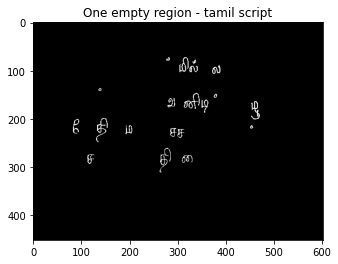

In [13]:
tam_ret = np.zeros(tam_lab.shape)

count = 0
for i in range(1, tam_num):
    new = np.where(tam_lab == i, 1, 0)
    new_in = 1 - new
    
    num, lab = connected_components(new_in, 8)
    if num == 3:
        count += 1
        tam_ret[new == 1] = 1
        
print("Number of letters having one empty region in tamil script:", count)

plt.imshow(tam_ret, cmap='gray')
plt.title("One empty region - tamil script")
plt.show()

#### (b). Letters containing two empty regions.

Number of letters having two empty regions in telugu script: 8


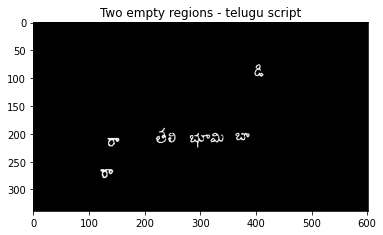

In [14]:
tel_ret = np.zeros(tel_lab.shape)

count = 0
for i in range(1, tel_num):
    new = np.where(tel_lab == i, 1, 0)
    new_in = 1 - new
    
    num, lab = connected_components(new_in, 8)
    if num == 4:
        count += 1
        tel_ret[new == 1] = 1
        
print("Number of letters having two empty regions in telugu script:", count)

plt.imshow(tel_ret, cmap='gray')
plt.title("Two empty regions - telugu script")
plt.show()

Number of letters having two empty regions in tamil script: 12


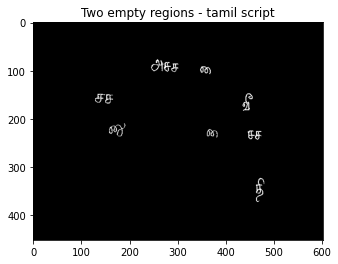

In [16]:
tam_ret = np.zeros(tam_lab.shape)

count = 0
for i in range(1, tam_num):
    new = np.where(tam_lab == i, 1, 0)
    new_in = 1 - new
    
    num, lab = connected_components(new_in, 8)
    if num == 4:
        count += 1
        tam_ret[new == 1] = 1
        
print("Number of letters having two empty regions in tamil script:", count)

plt.imshow(tam_ret, cmap='gray')
plt.title("Two empty regions - tamil script")
plt.show()